In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import math

from src.edges_and_fitting import *
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [ ]:
im.shape

In [3]:
def grad(mode):
    if mode=='sobel':
        gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        gy = gx.T
        g = np.dstack((gx,gy))
    if mode=='laplacian':
        gx = np.array([[1,1,1],[1,8,1],[1,1,1]])
        gy = gx.T
        g = np.dstack((gx,gy))
    return g

def get_im2col_indices(x_shape, field_height, field_width, p_x=1,p_y=1, stride=1):
    # First figure out what the size of the output should be
    _, C, H, W = x_shape
    assert (H + 2 * p_x - field_height) % stride == 0
    assert (W + 2 * p_y - field_height) % stride == 0
    out_height = int((H + 2 * p_x - field_height) / stride + 1)
    out_width = int((W + 2 * p_y - field_width) / stride + 1)

    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    j0 = np.tile(np.arange(field_width), field_height * C)
    j1 = stride * np.tile(np.arange(out_width), out_height)
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)

    k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)

    return (k, i, j)



def conv2d(im,g,stride=1,C=3):
    im = np.repeat(im[np.newaxis,:,:],2,axis=0)

    g = np.moveaxis(g,2,0)
    
    im = im[:,np.newaxis,:,:]
    N,_,H,W = im.shape
    _,h,w = g.shape
    
    stride=1
    h_pad = int((H*(stride-1)-stride+h)/2)
    w_pad = int((W*(stride-1)-stride+w)/2)

    k,i,j = get_im2col_indices((N,1,H,W), h, w, p_x=h_pad,p_y=w_pad, stride=1)

    im_padded = np.pad(im,((0,0),(0,0),(h_pad,h_pad),(w_pad,w_pad)),'mean')
    cols = im_padded[:,k,i,j]
    

    g = g.reshape((N,-1))

    
    sol = np.squeeze(np.matmul(g[:,np.newaxis,:],cols))
    
    return sol.reshape(N,H,W)

def GaussianFilter(w,h,sigma):
    m = (w-1)/2
    n = (h-1)/2
    G = []
    for i in range(w):
        for j in range(h):
            G.append((1/(2*math.pi*sigma**2))*math.e**(-1*((i-m)**2+(j-n)**2)/(2*sigma**2)))
    
    return np.array(G).reshape(w,h)

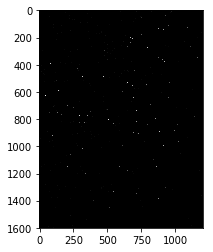

In [36]:
G = GaussianFilter(5,5,3)
G = np.dstack((G,G))

im = plt.imread('img/coins1.jpg')
im = np.mean(im,axis=2)
im = conv2d(im,G)[0]

g = grad('sobel')
R = conv2d(im,g)
S = np.sum(R**2,axis=0)
S = (S-S.min())/(S.max()-S.min())
S = np.clip(S,0.03,None)
rho = np.arctan2(R[1],R[0])
rho[rho<0]+= 2*math.pi

maxs = conv2d_max(S,(3,3))
S*=maxs
rho*=maxs
plt.imshow(S,**{'cmap':'gray'})

In [39]:
kp = np.argwhere(S[:1000])

In [40]:
H,W = im.shape

In [41]:
a = np.arange(0,W,30)
b = np.arange(0,H,30)
R = np.arange(10,300,10)

In [42]:
X = np.vstack(kp).T

In [43]:
A = np.meshgrid(a,b,R)

In [44]:
a = A[0].flatten()
b = A[1].flatten()
R = A[2].flatten()

In [45]:
r = np.sqrt((X[0,:][:,np.newaxis] - a)**2 + (X[1,:][:,np.newaxis] - b)**2)


In [46]:
a.shape

(62640,)

In [47]:
AA = np.zeros((R.shape[0],R.shape[0],R.shape[0]))

MemoryError: 

In [ ]:
pts = np.argwhere(S)
n = R

circles=[]
for i in range(10):
    N=0
    while N < 10:
        param,w,leverage = fit(pts,n,d=35,s=300,N=1000,T=500,sigmaGM=100)
        
        if np.mean(leverage)<0.5:
            a,b,R=param
            inliers = np.sum((pts - (a,b))**2,axis=1) < R**2          
            circles.append(param)
            
            a,b=param[:2]
            R = param[2]
            plt.imshow(im)#canny1.S,**{'cmap':'gray'})        
            circle = Circle((b,a),radius=R,color='red',fill=False,**{"linewidth":2})
            ax = plt.gca()
            ax.add_patch(circle)
            plt.axis('scaled')    
            
            pl.plot()
            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(3.0)
            break
        N+=1
    
    pts = pts[~inliers]

In [12]:


def get_im2col_indices_conv2d_max(x_shape, field_height, field_width, p_x=1,p_y=1, stride=1):
    # First figure out what the size of the output should be
    N, C, H, W = x_shape
    assert (H + 2 * p_x - field_height) % stride == 0
    assert (W + 2 * p_y - field_height) % stride == 0
    out_height = int((H + 2 * p_x - field_height) / stride + 1)
    out_width = int((W + 2 * p_y - field_width) / stride + 1)

    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    j0 = np.tile(np.arange(field_width), field_height * C)
    j1 = stride * np.tile(np.arange(out_width), out_height)
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)

    k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)

    return (k, i, j)


# In[46]:


def conv2d_max(f,g,k=1,**kwargs):
    #f = f[:,np.newaxis,:,:]
    #f = np.repeat(f,3,axis=1)

    if len(f.shape)==2:
        f = f[np.newaxis,np.newaxis,:,:]
    if len(f.shape)==3:
        f = f[:,np.newaxis,:,:]
        
    N,C,H,W=f.shape

    h,w = g

    x_pad = int(0.5*((W-1)*1-W+w))
    y_pad = int(0.5*((H-1)*1-H+w))

    f_pad = np.pad(f,((0,0),(0,0),(x_pad,x_pad),(y_pad,y_pad)),mode='maximum')

    k,i,j = get_im2col_indices_conv2d_max((N,C,H,W), h, w, p_x=x_pad,p_y=y_pad, stride=1)

    cols = f_pad[:,k,i,j]

    xc = int((h*w-1)/2)
    cols = np.delete(cols,xc,1)

    cond = ((f[:,:,:,:].flatten() >
             np.max(cols,axis=1).flatten())|(f[:,:,:,:].flatten() <
                                   np.min(cols,axis=1).flatten()))#&(np.abs(f[:,1,:,:].flatten())>0.03))

    return np.squeeze(np.moveaxis(cond.reshape(N,H,W),0,2))


In [ ]:
def peakDetection(x0,n_pad,S_pad):

    n0 = np.array(([n_pad[0][x0],n_pad[1][x0]]))

    q0 = x0 + n0*1/(2*math.sin(math.pi/8))

    k,l=np.rint(q0).astype(int).tolist()
    
    return S_pad[x0[0],x0[1]]>S_pad[k,l]


def canny(im,th=0.1,fsize=(3,3),sigma=1):
    M = im
    h,w = fsize
    gx =  DOG(h,w,sigma,'x')
    gy =  DOG(h,w,sigma,'y')

    grad_x = np.mean(conv2d(M,gx),axis=2)
    grad_y = np.mean(conv2d(M,gy),axis=2)

    R = (grad_x,grad_y)

    S = np.sqrt(grad_x**2+grad_y**2)
    mask = ma.masked_where(S > th*S.max(), S).mask

    n = mask*np.divide(R,S,out=np.zeros_like(R),where=S!=0)

    plot(S,**{'cmap':'gray'})
    
    H,W = S.shape
    k=1
    x_pad = int(0.5*((W-1)*k-W+w))
    y_pad = int(0.5*((H-1)*k-H+h))

    S_pad = np.pad(S,((y_pad,y_pad),(x_pad,x_pad)),mode='constant')
    nx_pad = np.pad(n[0],((y_pad,y_pad),(x_pad,x_pad)),mode='constant')
    ny_pad = np.pad(n[1],((y_pad,y_pad),(x_pad,x_pad)),mode='constant')

    peaks = np.zeros_like(S)
    count=0
    for i in range(H):
        for j in range(W):
            x0 = (i+1,j+1)

            if peakDetection(x0,(nx_pad,ny_pad),S_pad)==True:
                peaks[i,j]=1

            count+=1  
    print("Sanity check: {}".format(count==H*W))
    plot(peaks,**{'cmap':'gray'})
    return peaks